### Annual matter of extraterrestial origin arriving on Earth through meteorites in 20th century

Goal of the project:
* acquiring a dataset
* deciding which data from the dataset to include
* learning the fundamentals of data processing and visualisation in python

To achieve this goal a specific task has been defined:
* develop a python program that will proces the dataset of meteorites recorded by NASA and add up the total mass of the meteorites that fell on Earth each year throughought 20th century

___

The project starts by importing all necessary functions and packages, namely:
* ```pandas``` for importing and handling data
* ```pyplot``` from ```matplotlib``` for drawing charts

Aliases are used for ease of writing code.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Using ```dataframe``` data structure provided by ```pandas``` library allows for easy and efficient processing of datasets. Since the data is provided in ```.csv``` format, ```pandas``` allows to easily import it into a ```dataframe``` through use of ```read_csv()``` function.

In [2]:
df = pd.read_csv('data/meteorites.csv')

Since the original dataset contains data from scope larger than what's necessary for execution of the task, all rows (as signified by using the suffix ```.index```) from before year 1900 and after year 1999 as well as those that don't contain information about year and mass are removed from the ```dataframe```.

In [3]:
df = df[((df.year>=1900) & (df.year<=1999) & df.year.notna()) & (df.mass.notna())]

```pandas``` offers premade solutions for most common operations that can be performed on datasets. In this case ```.groupby()``` lets us easily group elements of a dataset based on the value we specified (in this case they are grouped by the value of the column ```'year'```) and then added together. The default type of the result is a ```pandas``` ```series```. It can easily be converted into a dataframe by using ```.to_frame()``` method.

In [4]:
df = df.groupby('year').mass.sum().to_frame()

With the ```dataframe``` of expected results ready all that is left to be done is displaying the results on a plot. A standard tool for that purpose is ```matplotlib``` library. ```.figure(figsize=(int, int))``` is used to define the dimensions of the plot. ```.yscale('log')``` lets us display the data on a logarithmic scale which is useful in the case of this dataset due to differences of entire orders of magnitude between individual values. ```.xlabel()```, ```.ylabel``` and ```.title()``` are used to label the plot and its axes. ```.plot(df)``` specifies what data should be plotted. ```.show()``` displays the plot according to settings specified earlier.

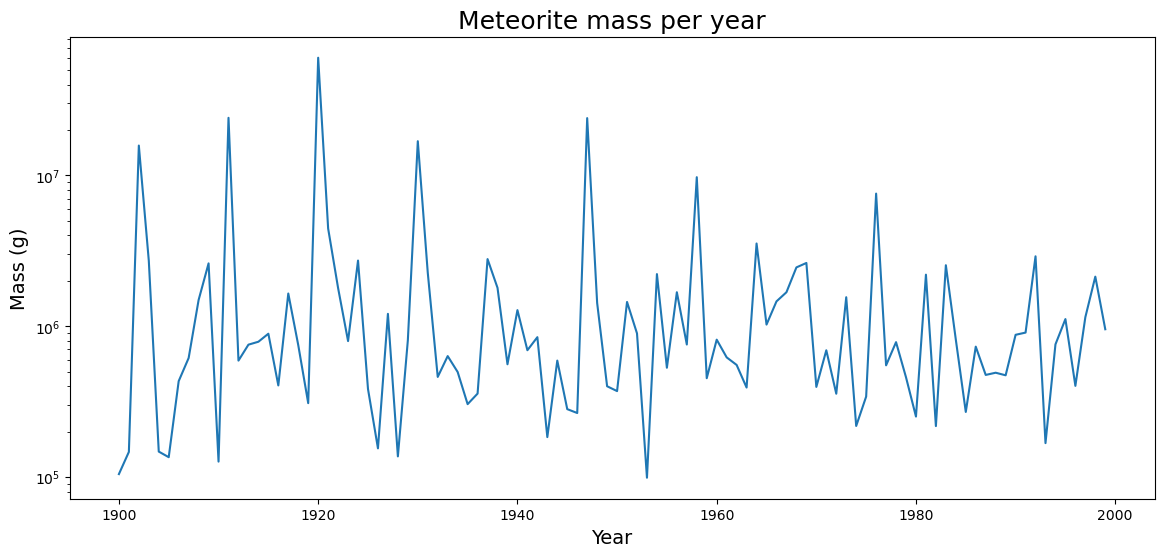

In [5]:
plt.figure(figsize=(14,6))
plt.yscale('log')
plt.xlabel("Year",  size = 14)
plt.ylabel("Mass (g)", size = 14)
plt.title("Meteorite mass per year", size = 18)
plt.plot(df)
plt.show()

***

Source of data: [NASA Meteorites Dataset at kaggle.com](https://www.kaggle.com/datasets/sujaykapadnis/meteorites-dataset)